In [1]:
import os

import graphviz
import networkx as nx
from networkx.drawing.nx_agraph import write_dot
import pathlib
import rdflib
import sys,time,copy,json
import pydot
from xsdata.models.enums import DataType
from xsdata.models.enums import QNames
from xsdata.formats.converter import QNameConverter
from xsdata.utils.namespaces import build_qname

from jinja2 import Environment, FileSystemLoader
from SPARQLWrapper import SPARQLWrapper, JSON
from rdflib import Graph, URIRef, Namespace, RDF, Literal
import rdfextras
from urllib.parse import urldefrag
import textwrap
import importlib
import dill
import traceback

In [2]:
from rdfobject import *

In [3]:

############main
 

datasetPath = pathlib.Path().resolve().parent.absolute() / 'input/GeneDiseaseAssociation.owl'
datasetPathstr ="%s" %(datasetPath)
 
 
scriptDir = pathlib.Path().resolve().absolute()
domain="http://www.disgenet.org/ds/DisGeNET/files/GeneDiseaseAssociation.owl#"
#domain="http://www.disgenet.org/ds/DisGeNET/files/GeneDiseaseAssociation_v4.owl#"
prefix="disgenet"
print("=========")
mp=ModelProcessor(datasetPathstr,scriptDir)

mp.createObjectModelGraph(domain,prefix)
mp.defineClassHierarchy()

for k in mp.classDict.keys():
    cm=mp.classDict[k]
    print("*************")
    print(cm.toJSON())

    
    
dpath = pathlib.Path().resolve().parent.absolute() / 'input/disgenet_mp.dill'
dpath="%s" %(dpath)     

mp.dump_meta_model(dpath)





*************
{
    "_TClassModel__attribute_name": {},
    "_TClassModel__attribute_name_all": {},
    "attribute": [],
    "attribute_all": [],
    "children": [],
    "comment": "##   Relationships mapped to this class: \"Disease-causing somatic mutation(s) in\"\n##   (Orphanet)\n",
    "domain": "http://www.disgenet.org/ds/DisGeNET/files/GeneDiseaseAssociation.owl#",
    "is_root": false,
    "name": "SomaticCausalMutation",
    "object_attribute_name": [],
    "object_attribute_name_all": [],
    "parent": [
        "CausalMutation"
    ],
    "pk": "http://www.disgenet.org/ds/DisGeNET/files/GeneDiseaseAssociation.owl#SomaticCausalMutation",
    "prefix": "disgenet",
    "rawcomment": "Relationships mapped to this class:\n\"Disease-causing somatic mutation(s) in\" (Orphanet)",
    "rdf_type": "http://www.disgenet.org/ds/DisGeNET/files/GeneDiseaseAssociation.owl#SomaticCausalMutation",
    "type_attribute_name": [],
    "type_attribute_name_all": []
}
*************
{
    "_TClassMo

In [4]:
mp.displayChildren()


--CausalMutation has child SomaticCausalMutation
--ModifyingMutation has child GermlineModifyingMutation
--GeneDiseaseAssociation has child Biomarker
--ModifyingMutation has child SomaticModifyingMutation
--Association has child GeneDiseaseAssociation
--GeneticVariation has child CausalMutation
--GenomicAlterations has child GeneticVariation
--Biomarker has child PostTranslationalModification
--GenomicAlterations has child FusionGene
--GenomicAlterations has child ChromosomalRearrangement
--GeneticVariation has child SusceptibilityMutation
--CausalMutation has child GermlineCausalMutation
--GeneticVariation has child ModifyingMutation
--Biomarker has child GenomicAlterations
--GeneDiseaseAssociation has child Therapeutic
--Biomarker has child AlteredExpression


In [5]:
mp.displayParent()

--SomaticCausalMutation has parent ['CausalMutation']
--GermlineModifyingMutation has parent ['ModifyingMutation']
--Biomarker has parent ['GeneDiseaseAssociation']
--SomaticModifyingMutation has parent ['ModifyingMutation']
--GeneDiseaseAssociation has parent ['Association']
--CausalMutation has parent ['GeneticVariation']
--GeneticVariation has parent ['GenomicAlterations']
--PostTranslationalModification has parent ['Biomarker']
--FusionGene has parent ['GenomicAlterations']
--ChromosomalRearrangement has parent ['GenomicAlterations']
--SusceptibilityMutation has parent ['GeneticVariation']
--GermlineCausalMutation has parent ['CausalMutation']
--ModifyingMutation has parent ['GeneticVariation']
--GenomicAlterations has parent ['Biomarker']
--Therapeutic has parent ['GeneDiseaseAssociation']
--AlteredExpression has parent ['Biomarker']
--Association has parent []


In [6]:
schemaFileName = pathlib.PurePath(datasetPathstr).stem + "-schema.dot"
schemaPath = pathlib.PurePath(datasetPath).with_name(schemaFileName)



mp.createOntologySchemaGraph(schemaPath)
dot_string=pathlib.Path("%s" %(schemaPath)).read_text()
#print(dot_string)
dotgraphs = pydot.graph_from_dot_data(dot_string)
dotgraph = dotgraphs[0]
gimagepath=str(schemaPath)[:-3] + "png"
print(gimagepath)
dotgraph.write_png(gimagepath)


/work/input/GeneDiseaseAssociation-schema.png


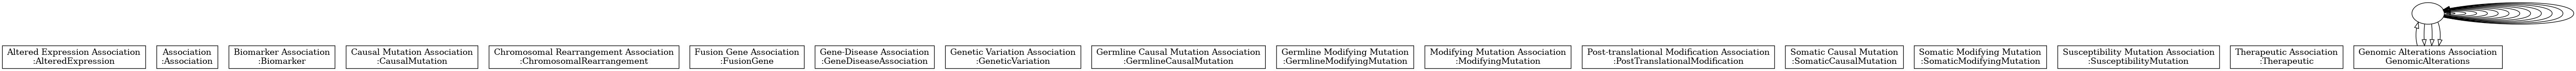

In [7]:
from IPython.display import Image
Image(filename=gimagepath) 

In [8]:
package_name="disgenet"
mcodeg=ModelCodeGenerator(package_name,mp.classDict,mp.prefix,mp.domain)
mcodeg.prepare_codegen()
mcodeg.codegen()
print("==end==")

directory  /work/script/disgenet already created 
directory  /work/script/disgenet/doc already created 
directory  /work/script/disgenet/utils already created 
writing /work/script/disgenet/somaticcausalmutation.py
writing /work/script/disgenet/germlinemodifyingmutation.py
writing /work/script/disgenet/biomarker.py
writing /work/script/disgenet/somaticmodifyingmutation.py
writing /work/script/disgenet/genediseaseassociation.py
writing /work/script/disgenet/causalmutation.py
writing /work/script/disgenet/geneticvariation.py
writing /work/script/disgenet/posttranslationalmodification.py
writing /work/script/disgenet/fusiongene.py
writing /work/script/disgenet/chromosomalrearrangement.py
writing /work/script/disgenet/susceptibilitymutation.py
writing /work/script/disgenet/germlinecausalmutation.py
writing /work/script/disgenet/modifyingmutation.py
writing /work/script/disgenet/genomicalterations.py
writing /work/script/disgenet/therapeutic.py
writing /work/script/disgenet/alteredexpressio